<a href="https://colab.research.google.com/github/steenbergen/DeepLearn/blob/main/feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

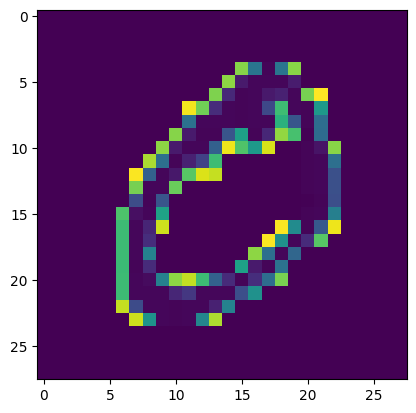

In [8]:
import numpy as np
import PIL.Image as pil
from matplotlib import pyplot as plt
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt


img1 = train_images[1]
gen_image(img1)

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

In [14]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**uint8** is an 8-bit unsigned integer from 0 through 255.